In [1]:
# import  
import pandas as pd
import numpy as np

# visualization library
import seaborn as sns
import matplotlib.pyplot as plt

# text analysis
import nltk 
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist

# Statistical library 
from scipy.stats import ttest_ind 

[nltk_data] Error loading punkt: [WinError 10053] An established
[nltk_data]     connection was aborted by the software in your host
[nltk_data]     machine


In [2]:
# load dataset
transaction = pd.read_excel(r"C:\Users\sonef\Downloads\QVI_transaction_data.xlsx")

In [3]:
customer = pd.read_csv(r"C:\Users\sonef\Downloads\QVI_purchase_behaviour.csv")

### Transaction data

In [4]:
# Check the dataset
transaction.info()
transaction.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [5]:
# Extract the weight of the product and put in a new column name PACK_SIZE
transaction[ "PACK_SIZE"]= transaction.PROD_NAME.str.extract('(\d+)').astype(int) # convert to number

transaction.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [6]:
# Create a fuction to clean special character and the weight part in PROD_NAME
import re
def clean_PROD_NAME(name):
    name = re.sub('[&/]','', name) # Remove special character & and /
    name = re.sub('\d\w*', '', name)
    return name 

transaction.PROD_NAME = transaction.PROD_NAME.apply(clean_PROD_NAME)
transaction.head(5)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8,150


In [7]:
# Look at the most common word of the product name
prodname = transaction.PROD_NAME

string = ''.join(prodname)
prodword = word_tokenize(string)


In [8]:
# Return the top 5 most frequent words in product name
wordfreq = fdist(prodword)
# put it in a dataframe 
wordfreq = pd.DataFrame(list(wordfreq.items()), columns= ["Word", "Frequency"]).sort_values(by= 'Frequency', ascending = False)
wordfreq.head(5)

,Word,Frequency
9,Chips,49770
13,Kettle,38851
5,Cheese,27890
6,Smiths,26969
24,Salt,24719


In [9]:
# Based on the guidance, we need to remove salsa products
transaction["PROD_NAME"] = transaction["PROD_NAME"].apply(lambda x : x.lower())
transaction = transaction[~transaction["PROD_NAME"].str.contains('salsa')]
transaction.PROD_NAME = transaction.PROD_NAME.apply(lambda x: x.title())


transaction.head(5)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly Screamonion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshnyjlpno Chili,3,13.8,150


In [10]:
# Move on to check the PRO_NBR and PROD_QTY
transaction.PROD_QTY.value_counts()
# there are two order quantity of 200 packes - it seems a bit suspicious. We will take a deeper look
transaction.loc[transaction["PROD_QTY"] == 200,:]
# there is one customer buy two times, at the same store, on diffirent date. 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [11]:
# Lets take a look at the historical purchases of the buyer with loyalty card number is 226000
transaction.loc[transaction.LYLTY_CARD_NBR == 226000, :]
# This person only make two transaction over the year. He/she must me retailer who buy in bulk.
# Therefore, we would drop this customer from the list

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [12]:
# Filter out outlier
# Drop the customer with number 226000 in both transaction and purchase table
transaction.drop(transaction.index[transaction.LYLTY_CARD_NBR == 226000], inplace= True)
customer.drop(customer.index[customer.LYLTY_CARD_NBR == 226000], inplace = True)
# Make sure it is drop
transaction.loc[transaction.LYLTY_CARD_NBR == 226000, :]
customer.loc[customer.LYLTY_CARD_NBR == 226000, :]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


In [13]:
# Summarize the transaction dataset
transaction.describe()
transaction.isnull().sum()
# There is no null data in transaction. 

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PACK_SIZE         0
dtype: int64

In [14]:
# Count the number of date in the transaction
transaction.DATE.nunique()
# There are 364 days, we have one data missing

364

In [15]:
# Looking for the missing date
pd.date_range(start = transaction.DATE.min(), end = transaction.DATE.max()).difference(transaction.DATE)
# The missing date is 2018-12-25 or Chrismas Day. Make sense when we have no transaction on Chrismas Day


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [16]:
# Create a dataframe about total sales for each date using pivot table
a = pd.pivot_table(transaction,values= "TOT_SALES", index= "DATE", aggfunc= sum)
a.head(10)
# Create a dataset including the Chrismas date 2018-12-25
b = pd.DataFrame(index= pd.date_range(start = transaction.DATE.min(), end = transaction.DATE.max()))
b["TOT_SALES"] = 0
# Combine two dataset to have a sequence of date for one full year. Replace null value with 0
c = a+b
c.fillna(0,inplace=True)
# Recheck the value 0 
c.loc[c.TOT_SALES == 0]  

,TOT_SALES
2018-12-25,0.0


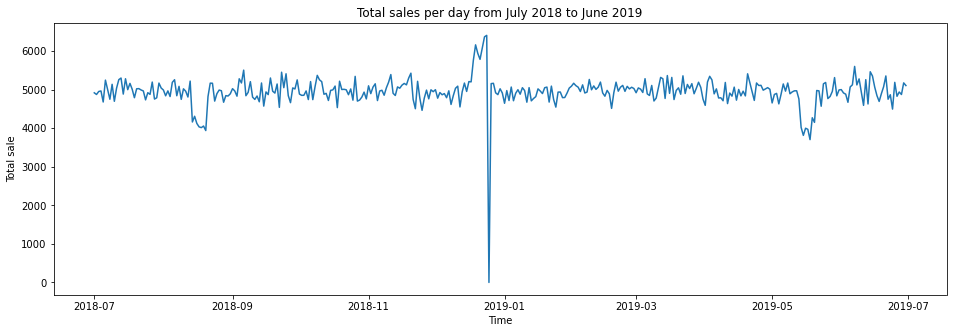

In [17]:
# Plot the total sales 
plt.figure(figsize = (16,5))
plt.plot(c.index, c.TOT_SALES)
plt.title("Total sales per day from July 2018 to June 2019")
plt.xlabel("Time")
plt.ylabel("Total sale")
plt.show()
# We witnessed a rise in the lead-up to Chrismas
# The sales for Chrismas day is 0 as most stores are closed on that day

<AxesSubplot:>

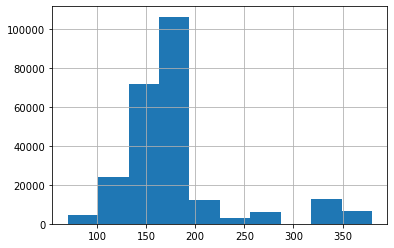

In [18]:
# We move on to examine the pack size 
# Check if the pack size is sensible 
transaction.PACK_SIZE.value_counts()
transaction.PACK_SIZE.hist() # The pack size seems sensible

In [19]:
# First word in the PROD_NAME is the brand name. Extract the brand name and examine them 
part = transaction.PROD_NAME.str.partition()
transaction["BRAND"] = part[0]
transaction.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly Screamonion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshnyjlpno Chili,3,13.8,150,Kettle


In [20]:
# Examine the brand
transaction.BRAND.unique()
# There are some words indicating the same brand such as: Doritos & Dorito, Snbts & Sunbites, ...
# Rename for consistency
transaction.BRAND.replace(['Rrd', 'Red'], 'Red Rock Deli', inplace = True)
transaction.BRAND.replace('Ccs', 'CCS', inplace = True)
transaction.BRAND.replace('Smith', 'Smiths', inplace = True)
transaction.BRAND.replace('Dorito', 'Dotitos', inplace = True)
transaction.BRAND.replace('Snbts', 'Sunbites', inplace = True)
transaction.BRAND.replace('Ncc', 'Natural', inplace = True)
transaction.BRAND.replace('Infzns', 'Infuzions', inplace = True)
transaction.BRAND.replace('Ww', 'Woolworths', inplace = True)
transaction.BRAND.replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
# Recheck
transaction.BRAND.unique()

array(['Natural', 'CCS', 'Smiths', 'Kettle', 'Grainwaves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Dotitos', 'Tyrrells',
       'Cobs', 'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [21]:
transaction.groupby("BRAND").TOT_SALES.sum().sort_values(ascending = False)
# Kettle has the highest chips sales

BRAND
Kettle           390239.8
Smiths           217492.0
Doritos          187277.9
Pringles         177655.5
Infuzions         99047.6
Thins             88852.5
Red Rock Deli     87607.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
Tyrrells          51647.4
Grainwaves        51617.2
Natural           42318.0
Woolworths        41059.1
Cheezels          40029.9
Dotitos           39052.0
CCS               18078.9
Cheetos           16884.5
Sunbites           9676.4
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

### Customer data

In [22]:
# Move on to the customer dataset
customer.head(5)
customer.LIFESTAGE.unique()
customer.PREMIUM_CUSTOMER.unique()
customer.LYLTY_CARD_NBR.nunique() # There are 72636 unique loyalty customer number


72636

In [23]:
customer.isnull().sum() # there is no missing value

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

c:\Users\sonef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


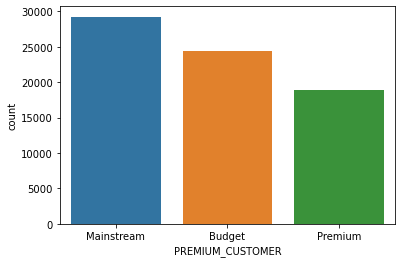

In [24]:
f = customer.PREMIUM_CUSTOMER.value_counts().sort_values(ascending = False)
sns.countplot(customer.PREMIUM_CUSTOMER, order= f.index);

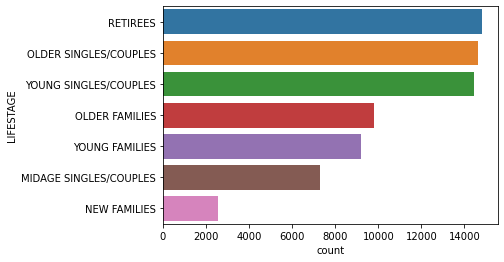

In [25]:
# Plot the distribution of each lifestage
d = customer.LIFESTAGE.value_counts().sort_values(ascending = False)
sns.countplot(y = customer.LIFESTAGE, order = d.index);


### Merge transaction and customer dataset 

In [26]:
# Merge two dataset on LYLY_CARD_NBR
data = pd.merge(transaction, customer, on= "LYLTY_CARD_NBR", how ='left')
print("The shape of transaction, customer, and data respectively are:\n", transaction.shape, customer.shape, data.shape)

The shape of transaction, customer, and data respectively are:
 (246740, 10) (72636, 3) (246740, 12)


In [27]:
data.isnull().sum() # There is no null data. All data is matched well
data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly Screamonion,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshnyjlpno Chili,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


### Data analysis on customer segements
Now that the data is ready for analysis, we can define some metrics of interest to the client: 
Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment


In [28]:
# Who spends the most on chips (total sales), describing customers by lifestage and
# how premium their general purchasing behaviour is
sale = pd.DataFrame(data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).TOT_SALES.sum())
sale.sort_values(by = 'TOT_SALES', ascending = False, inplace = True)
sale.rename(columns = {"TOT_SALES":"Total_sales"}, inplace = True)
sale.head(5)

,,Total_sales
LIFESTAGE,PREMIUM_CUSTOMER,
OLDER FAMILIES,Budget,156863.75
YOUNG SINGLES/COUPLES,Mainstream,147582.20
RETIREES,Mainstream,145168.95
YOUNG FAMILIES,Budget,129717.95
OLDER SINGLES/COUPLES,Budget,127833.60


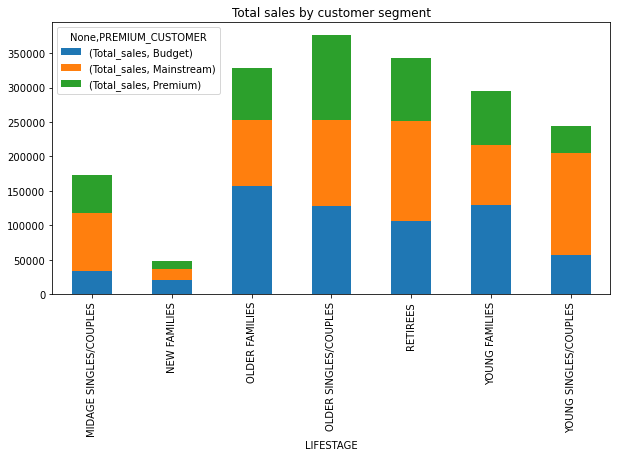

In [29]:
sale.unstack().plot( kind='bar',stacked = True, title = 'Total sales by customer segment', figsize = (10,5));


In [30]:
# Check if higher sales is due to higher amount of cusotmers per segement 
customer_count =pd.DataFrame(customer.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"]).LYLTY_CARD_NBR.nunique())
customer_count.rename(columns ={'LYLTY_CARD_NBR':'Customer_count'}, inplace = True)
customer_count.sort_values(by = 'Customer_count', ascending = False)


Customer_count
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES             8088
                 RETIREES                          6479
                 OLDER SINGLES/COUPLES             4930
Budget           OLDER SINGLES/COUPLES             4929
Premium          OLDER SINGLES/COUPLES             4750
Budget           OLDER FAMILIES                    4675
                 RETIREES                          4454
                 YOUNG FAMILIES                    4017
Premium          RETIREES                          3872
Budget           YOUNG SINGLES/COUPLES             3779
Mainstream       MIDAGE SINGLES/COUPLES            3340
                 OLDER FAMILIES                    2831
                 YOUNG FAMILIES                    2728
Premium          YOUNG SINGLES/COUPLES             2574
                 YOUNG FAMILIES                    2433
                 MIDAGE SINGLES/COUPLES            2431
                 OLDER FAMILIES                    2273
Budget           MIDAGE SINGLES/COUPLES            1504
                 NEW FAMILIES                      1112
Mainstream       NEW FAMILIES                       849
Premium          NEW FAMILIES                       588

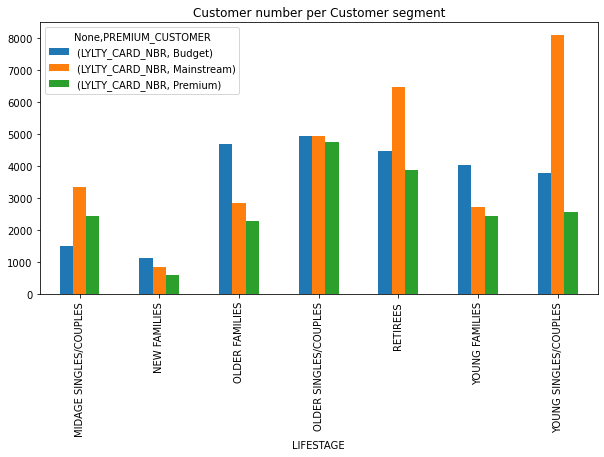

In [31]:
#Let's see if the higher sales are due to there being more customers who buy chips

customer_count =pd.DataFrame(customer.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).LYLTY_CARD_NBR.nunique())
customer_count.unstack().plot(kind = 'bar', title = 'Customer number per Customer segment', figsize = (10,5));
# Older families have the highest total sales amount, but number of customers in this segment ranked 4th
# This can mean they tend to buy more for their family or they prefer higher price products


In [32]:
#There are more Mainstream - young singles/couples and Mainstream - retirees who buy
#chips. This contributes to there being more sales to these customer segments but
#this is not a major driver for the Budget - Older families segment.

#### There are more Mainstream - young singles/couples and Mainstream - retirees who buy
#### chips. This contributes to there being more sales to these customer segments but
#### this is not a major driver for the Budget - Older families segment.

#### Higher sales may also be driven by more units of chips being bought per customer.

In [33]:
# Calculate the average purchase by each lifestage and customer segment
avg = data.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).PROD_QTY.sum()/ data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).LYLTY_CARD_NBR.nunique()
avg = pd.DataFrame(avg, columns = {"Avg_unit"})
avg.sort_values(by= 'Avg_unit', ascending= False, inplace= True)
avg
# An Older Families they buy more, which exlpain the highest value in total sales. 

,,Avg_unit
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013
Mainstream,YOUNG FAMILIES,8.638361
Budget,OLDER SINGLES/COUPLES,6.781398
Premium,OLDER SINGLES/COUPLES,6.769543
Mainstream,OLDER SINGLES/COUPLES,6.712021


<AxesSubplot:title={'center':'AVG unit bought per customer segment'}, xlabel='PREMIUM_CUSTOMER'>

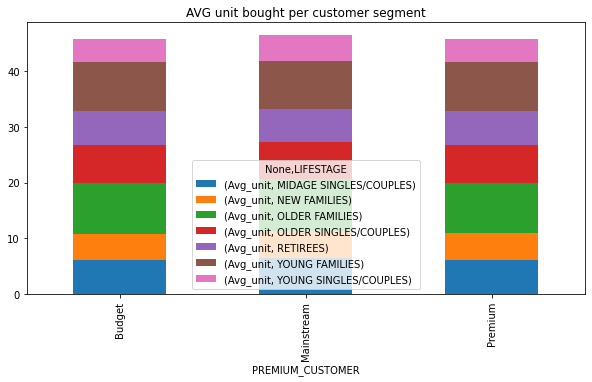

In [34]:
avgplot = data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).PROD_QTY.sum()/ data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).LYLTY_CARD_NBR.nunique()
avg.unstack().plot(kind ='bar', stacked = True, title = 'AVG unit bought per customer segment', figsize = (10,5))

# Older families and Young families on average buy more than the other group.

In [35]:
# Examine the avarage price to see if diffirent customer segment prefer diffirent price range of chips
avgprice = data.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"]).TOT_SALES.sum() / data.groupby(["PREMIUM_CUSTOMER","LIFESTAGE"]).PROD_QTY.sum()
avgprice = pd.DataFrame(avgprice, columns= {'AVG_price_per_unit'})
avgprice.sort_values( by = 'AVG_price_per_unit', ascending = False, inplace = True)
avgprice 

AVG_price_per_unit
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES             4.074043
                 MIDAGE SINGLES/COUPLES            3.994449
                 NEW FAMILIES                      3.935887
Budget           RETIREES                          3.932731
                 NEW FAMILIES                      3.931969
Premium          RETIREES                          3.924037
                 OLDER SINGLES/COUPLES             3.897698
Budget           OLDER SINGLES/COUPLES             3.887529
Premium          NEW FAMILIES                      3.886168
Mainstream       RETIREES                          3.852986
                 OLDER SINGLES/COUPLES             3.822753
Premium          MIDAGE SINGLES/COUPLES            3.780823
Budget           YOUNG FAMILIES                    3.761903
Premium          YOUNG FAMILIES                    3.759232
Budget           MIDAGE SINGLES/COUPLES            3.753878
                 OLDER FAMILIES                    3.747969
Mainstream       OLDER FAMILIES                    3.736380
                 YOUNG FAMILIES                    3.722439
Premium          OLDER FAMILIES                    3.717703
                 YOUNG SINGLES/COUPLES             3.692889
Budget           YOUNG SINGLES/COUPLES             3.685297

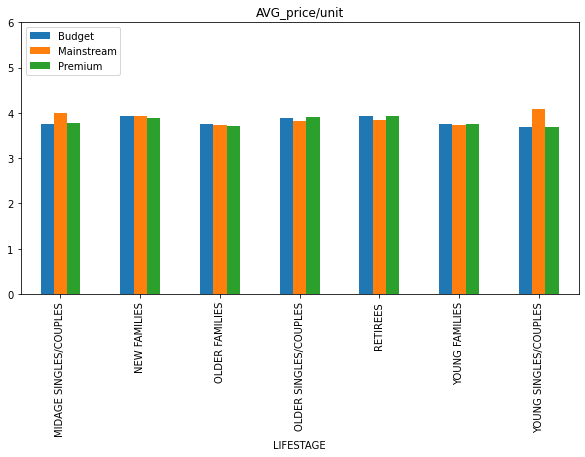

In [36]:
priceplot = data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).TOT_SALES.sum() / data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).PROD_QTY.sum()
priceplot.unstack().plot(kind = 'bar', title = 'AVG_price/unit', figsize = (10,5), legend = 2, ylim = (0,6));
plt.legend(loc = 2)
# Mainstream of Young and Midage singles/couples are willing to pay more for a unit of chips.

Explaination from the solution sheet of Quantium(sensible explaination!)
Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.

In [37]:
# The diffirence of avg price per unit is small
# perfrom t-test mainstream and non mainstream customer segment from midage and young single/couples
# to see if the diffirence is statistically diffirent
# Create a new dataframe 
test_data = data
# New column Price
test_data["PRICE"]= test_data.TOT_SALES / test_data.PROD_QTY
test_data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly Screamonion,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshnyjlpno Chili,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [38]:
# Group mainstream and non mainstream of midage and young singles/couples
mainstream = test_data.loc[(test_data.PREMIUM_CUSTOMER == 'Mainstream') & 
            ((test_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES')| (test_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES'))]
mainstream.head(5)
# Non mainstream group (premium and budget)
non_mainstream = test_data.loc[(test_data.PREMIUM_CUSTOMER != 'Mainstream') & 
            ((test_data.LIFESTAGE == 'MIDAGE SINGLES/COUPLES')| (test_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES'))]
non_mainstream.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly Screamonion,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshnyjlpno Chili,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [39]:
print("For mainstream, average price per unit is:", np.mean(mainstream.PRICE))
print("For non-mainstream, average price per unit is:", np.mean(non_mainstream.PRICE))
# Mainstream has higher price per unit

For mainstream, average price per unit is: 4.039785893795144
For non-mainstream, average price per unit is: 3.70649131996387


In [40]:
# t-test 
ttest_ind(mainstream.PRICE, non_mainstream.PRICE)
# Mainstream price per unit is significantly higher than non_mainstream group
# Mianstream customers tend to buy more expensive brand

Ttest_indResult(statistic=37.83196107667815, pvalue=2.235645611549355e-309)

Deep dive into specific customer segments for insights
We have found quite a few interesting insights that we can dive deeper into.
We might want to target customer segments that contribute the most to sales to
retain them or further increase sales. Let's look at Mainstream - young
singles/couples. For instance, let's find out if they tend to buy a particular
brand of chips.


In [41]:
# dataset for mainstream young singles/couples
mstr = data.loc[(data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (data.PREMIUM_CUSTOMER == 'Mainstream')]
mstr.head(5)
# dataset for premium and budget young singles/couples
non_mstr = data.loc[(data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (data.PREMIUM_CUSTOMER != 'Mainstream')]
non_mstr.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.0
212772,2018-11-09,77,2330311,236755,90,Tostitos Smoked Chipotle,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Budget,4.4
212773,2019-05-16,1,1076,87,107,Smiths Crinkle Cut French Oniondip,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Budget,2.6
212774,2019-05-17,1,1165,192,12,Natural Chip Co Tmato Hrbspce,1,3.0,175,Natural,YOUNG SINGLES/COUPLES,Budget,3.0
212775,2018-08-16,1,1282,319,67,Rrd Chilli Coconut,1,2.7,150,Red Rock Deli,YOUNG SINGLES/COUPLES,Budget,2.7


In [42]:
# Find brand preference of mainstream young singles/couples
mstr_brand = mstr.loc[:,['BRAND', 'PROD_QTY']]
mstr_brand.head()
mstr_sum = mstr_brand.PROD_QTY.sum()
mstr_brand["BRAND_AFFINITY"] = mstr_brand.PROD_QTY / mstr_sum
mstr_brand = pd.DataFrame(mstr_brand.groupby('BRAND').BRAND_AFFINITY.sum())


In [43]:
# Brand preference of non_mainstream young singles/couples
non_mstr_brand = non_mstr.loc[:, ['BRAND', 'PROD_QTY']]
non_sum = non_mstr_brand.PROD_QTY.sum()
non_mstr_brand["NON_MSTR_BRAND_AFFINITY"] = non_mstr_brand.PROD_QTY / non_sum 
non_mstr_brand = pd.DataFrame(non_mstr_brand.groupby('BRAND').NON_MSTR_BRAND_AFFINITY.sum())
non_mstr_brand.head(5)

,NON_MSTR_BRAND_AFFINITY
BRAND,
Burger,0.007939
CCS,0.024890
Cheetos,0.013193
Cheezels,0.018562
Cobs,0.037354


In [44]:
# merge two dataframe
brand = pd.merge(mstr_brand, non_mstr_brand, on = 'BRAND')
brand['AFFINITY_BRAND'] = brand.BRAND_AFFINITY / brand.NON_MSTR_BRAND_AFFINITY
brand.sort_values(by = 'AFFINITY_BRAND', ascending= False).head(5)
# Mainstream young singles/couples prefer Doritos over other brands

,BRAND_AFFINITY,NON_MSTR_BRAND_AFFINITY,AFFINITY_BRAND
BRAND,,,
Doritos,0.107053,0.078543,1.362993
Kettle,0.197985,0.146539,1.351074
Tostitos,0.045411,0.034094,1.331926
Tyrrells,0.031553,0.023854,1.322732
Dotitos,0.015707,0.011889,1.321194


Move on to pack size affinity

In [45]:
# Mainstream 
mstr_pack = mstr.loc[:, ["PROD_QTY", "PACK_SIZE"]]
mstr_pack["MSTR_PACK_AFFINITY"] = mstr_pack.PROD_QTY / mstr_pack.PROD_QTY.sum()
mstr_pack = pd.DataFrame(mstr_pack.groupby('PACK_SIZE').MSTR_PACK_AFFINITY.sum())
mstr_pack.head(5)
# Non mainstream 
non_pack = non_mstr.loc[:, ["PROD_QTY", "PACK_SIZE"]]
non_pack["NON_MSTR_PACK_AFFINITY"] = non_pack.PROD_QTY / non_pack.PROD_QTY.sum()
non_pack = pd.DataFrame(non_pack.groupby('PACK_SIZE').NON_MSTR_PACK_AFFINITY.sum())
non_pack.head(5)

,NON_MSTR_PACK_AFFINITY
PACK_SIZE,
70,0.008092
90,0.015149
110,0.083145
125,0.008092
134,0.096299


In [46]:
# Merge two dataframe
pack = pd.merge(mstr_pack, non_pack, on = 'PACK_SIZE')
pack["PACK_AFFINITY"] = pack.MSTR_PACK_AFFINITY / pack.NON_MSTR_PACK_AFFINITY
pack.sort_values(by = 'PACK_AFFINITY', ascending = False).head(5)
# mainstream young singles/couples prefer to buy 330g pack size compared to other packsize

,MSTR_PACK_AFFINITY,NON_MSTR_PACK_AFFINITY,PACK_AFFINITY
PACK_SIZE,,,
330,0.061284,0.043490,1.409146
380,0.032160,0.023011,1.397625
270,0.031829,0.022934,1.387855
110,0.106280,0.083145,1.278255
134,0.119420,0.096299,1.240097


In [47]:
# Which brand offer 330g pack size 
data.loc[data.PACK_SIZE == 330].value_counts('BRAND')
# There are three brand that sell 330 g pack size. They are Smiths, Cheezels, and Doritos

BRAND
Smiths      6339
Cheezels    3149
Doritos     3052
dtype: int64

### Sumarize
- Total sales are highest for Older Families(Budget), Yound singles/couples (Mainstream), and Retires(Mainstream)
- The main reason for high total sales for Young single/couples and Retires is due to higher number of customers in this group
- Each customer in Older Families group on average buy more product units than the other
- Young singples/couple Mainstream tend to pay more per packet of chip. They prefer Torritos brand and pack size of 330g 